In [1]:
import numpy as np
import pandas as pd


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

wine = wine.data.original

In [3]:
wine.head(100)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937,2
96,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625,2
97,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428,2
98,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660,2


In [4]:
wine.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

In [5]:
categorical = [var for var in wine.columns if wine[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [6]:
wine.shape

(178, 14)

In [7]:
# find numerical variables

numerical = [var for var in wine.columns if wine[var].dtype!='O' and var!='class' ]

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 13 numerical variables

The numerical variables are : ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']


In [8]:
wine[numerical].head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
wine[numerical].isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [10]:
# Separate features and target class
X = wine.drop(columns=['class'])
y = wine['class']
# Identify numerical and categorical columns
numeric_features = numerical
categorical_features = categorical

# Define preprocessing steps for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder())  # One-hot encode categorical features
])

# Combine preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ],
    remainder='passthrough'  # Pass through columns not specified in transformers
)

# Apply preprocessing to the features only
X_preprocessed = preprocessor.fit_transform(X)

# Get the names of transformed columns
transformed_feature_names = list(numeric_features)

# Create a DataFrame with transformed features
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=transformed_feature_names + list(X.columns[len(transformed_feature_names):]))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42) # 80% training and 20% test

# DECISION TREE

In [12]:
from sklearn.model_selection import GridSearchCV
dt_clf = DecisionTreeClassifier()

In [13]:
# Hyper tuning for Decision Tree classifier
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,25)),
    'min_samples_leaf': list(range(1,20))
}

grid_serach_dt = GridSearchCV(estimator = dt_clf,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_serach_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [14]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_dt.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_dt.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_dt.best_estimator_))

GridSearch CV best score : 0.9360


Parameters that give the best results : 

 {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2)


In [15]:
# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=17, min_samples_leaf=2, random_state=42)
# Train Decision Tree Classifer
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

In [16]:
print('Training set score: {:.4f}'.format(dt_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_clf.score(X_test, y_test)))

Training set score: 0.9930
Test set score: 0.9167


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=dt_clf.score(X_test,y_test)
print("\nThe accuracy of decision tree classifier dataset is "+str(round(accuracy*100,2))+"%")

[[14  0  0]
 [ 0 14  0]
 [ 1  2  5]]

The accuracy of decision tree classifier dataset is 91.67%


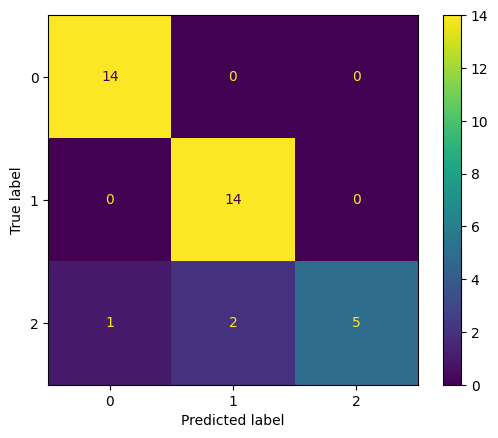

In [18]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [19]:
y_pred_lr = dt_clf.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.88      1.00      0.93        14
           3       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



# NAIVE BAYES

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
nb_clf = GaussianNB()

In [22]:
# Hyper tuning for Decision Tree classifier
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_serach_nb = GridSearchCV(estimator = nb_clf,
                           param_grid = params_NB,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_serach_nb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [23]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_nb.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_nb.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_nb.best_estimator_))

GridSearch CV best score : 0.9717


Parameters that give the best results : 

 {'var_smoothing': 0.3511191734215131}


Estimator that was chosen by the search : 

 GaussianNB(var_smoothing=0.3511191734215131)


In [24]:
nb_clf = GaussianNB(var_smoothing=0.3511191734215131)
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print('Training set score: {:.4f}'.format(nb_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(nb_clf.score(X_test, y_test)))

Training set score: 0.9718
Test set score: 0.9722


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=nb_clf.score(X_test,y_test)
print("\nThe accuracy of  Naive bayes classifier on dataset is "+str(round(accuracy*100,2))+"%")

[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]

The accuracy of  Naive bayes classifier on dataset is 97.22%


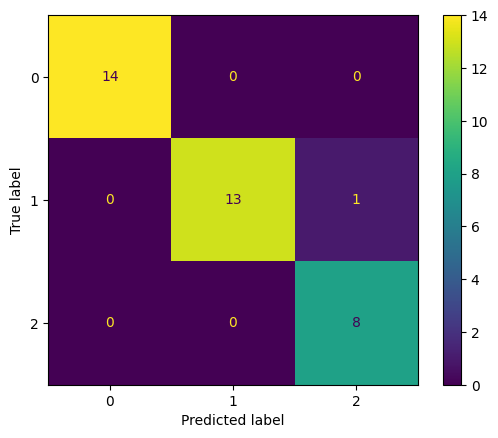

In [26]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [27]:
y_pred_lr = nb_clf.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.93      0.96        14
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



# SVM(Support Vector Machine)

In [28]:
from sklearn.svm import SVC
svm_clf = SVC(C=1)

In [29]:
param_grid = [
  {'kernel':['linear']},
  {'kernel':['rbf'], 'gamma':[0.001, 0.0001]}
]

In [30]:
grid_serach_svm = GridSearchCV(estimator = svm_clf,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_serach_svm.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=SVC(C=1),
             param_grid=[{'kernel': ['linear']},
                         {'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
             scoring='accuracy', verbose=1)

In [31]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_svm.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_svm.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_svm.best_estimator_))

GridSearch CV best score : 0.9436


Parameters that give the best results : 

 {'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=1, kernel='linear')


In [32]:
svm_clf = SVC(C=1, kernel='linear')

In [33]:
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print('Training set score: {:.4f}'.format(svm_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svm_clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9722


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=svm_clf.score(X_test,y_test)
print("\nThe accuracy of SVM classifier  on  dataset is "+str(round(accuracy*100,2))+"%")

[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]

The accuracy of SVM classifier  on  dataset is 97.22%


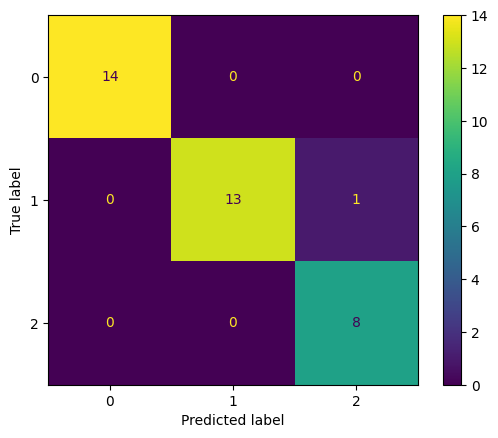

In [35]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [36]:
y_pred_lr = svm_clf.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_lr))

SVM Classifier report: 

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.93      0.96        14
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [38]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid_serach_knn = GridSearchCV(estimator = knn_clf,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_serach_knn.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [39]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_knn.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_knn.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_knn.best_estimator_))

GridSearch CV best score : 0.9579


Parameters that give the best results : 

 {'n_neighbors': 5}


Estimator that was chosen by the search : 

 KNeighborsClassifier()


In [40]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [41]:
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print('Training set score: {:.4f}'.format(knn_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn_clf.score(X_test, y_test)))

Training set score: 0.9859
Test set score: 0.9444


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=knn_clf.score(X_test,y_test)
print("\nThe accuracy of KNN classifier  on  dataset is "+str(round(accuracy*100,2))+"%")

[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]

The accuracy of KNN classifier  on  dataset is 94.44%


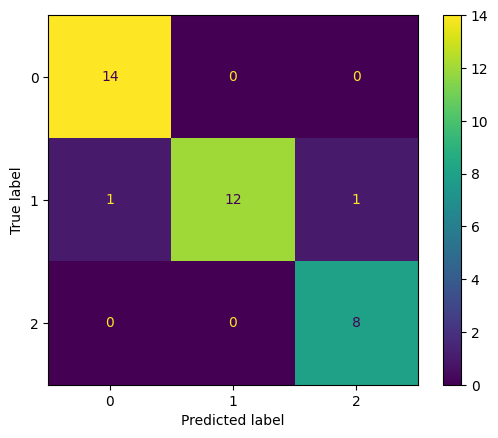

In [43]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [44]:
y_pred_lr = knn_clf.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_lr))

KNN Classifier report: 

               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [45]:
cart = DecisionTreeClassifier()

# Hyper tuning for Decision Tree classifier
params = {
    'criterion': ['gini'],
    'max_depth': list(range(1,25)),
    'min_samples_leaf': list(range(1,20))
}

grid_serach_cart = GridSearchCV(estimator = cart,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_serach_cart.fit(X_train, y_train)



# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_cart.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_cart.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_cart.best_estimator_))

GridSearch CV best score : 0.9224


Parameters that give the best results : 

 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=3)


In [46]:
cart = DecisionTreeClassifier(max_depth=3)
cart.fit(X_train, y_train)
y_pred = cart.predict(X_test)
print('Training set score: {:.4f}'.format(cart.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(cart.score(X_test, y_test)))

Training set score: 0.9930
Test set score: 0.9444


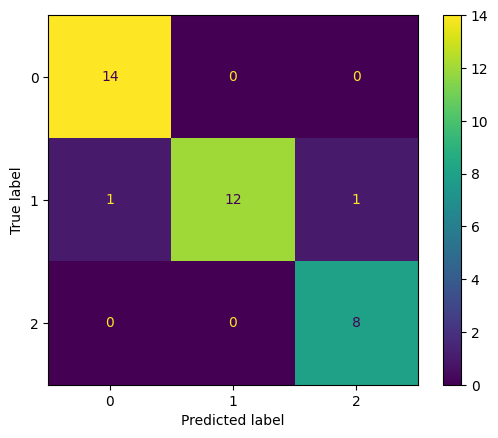

In [47]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [48]:
y_pred_lr = cart.predict(X_test)
print("CART Classifier report: \n\n", classification_report(y_test, y_pred_lr))

CART Classifier report: 

               precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

